<a href="https://colab.research.google.com/github/8464947452/final-project-fake-news-detection/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Description**

**Introduction**
The aim of this project is to apply Machine Learning (ML) and Natural Language Processing (NLP) techniques to detect and classify fake news articles. The project investigates how well computational methods can differentiate between real and fabricated statements by analyzing linguistic and semantic cues.
It will compare traditional ML models (such as TF-IDF + Logistic Regression) against advanced transformer-based architectures (like BERT) to determine which approach provides higher accuracy and interpretability. Explainability tools (e.g., SHAP) will be used to identify key features influencing prediction outcomes, offering insights into patterns of misinformation.

**Research Questions:**
1. Can ML and NLP approaches reliably distinguish fake from real news articles across different domains?

2. Which linguistic and semantic cues most strongly indicate misinformation when analyzed using explainability methods?

3. How does model performance vary between shallow ML techniques and deep transformer models?

**Dataset Information**

**Name:** LIAR Dataset – Fake News Detection

**Source:** University of California, Santa Barbara – William Yang Wang (2017)

**Origin:** Collected from PolitiFact (2007–2016)

**Details:** Contains over 12,000 short political statements, each manually labeled for truthfulness from “pants-on-fire” to “true.”

# **Importing Files**

In [31]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# **Reading Dataset**

In [32]:
df = pd.read_csv('train.tsv', sep='\t', header=None, dtype=str)


# **Printing Shape**

In [33]:
print("Shape:", df.shape)

Shape: (10240, 14)


# **Printing First Few Rows**

In [34]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0,0,0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7,19,3,5,44,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15,9,20,19,2,an interview on CNN


# **Droping unnecessary columns and labeling the columns in dataset**

In [35]:
df.columns = [
    "id", "label", "statement", "subject", "speaker", "speaker_job_title",
    "state_info", "party_affiliation", "barely_true_counts", "false_counts",
    "half_true_counts", "mostly_true_counts", "pants_on_fire_counts",
    "context"
]



# Drop unnecessary id column if present
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

In [36]:
df

,label,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0,0,0,a mailer
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7,19,3,5,44,a news release
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15,9,20,19,2,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0,1,1,1,0,"interview on ""The Colbert Report"""
10236,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0,0,0,1,0,an interview
10237,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4,11,5,3,3,a Republican presidential debate
10238,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3,1,3,0,0,a televised debate on Miami's WPLG-10 against ...


# **Checking Missing Values**

In [37]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
label                      0
statement                  0
subject                    2
speaker                    2
speaker_job_title       2898
state_info              2210
party_affiliation          2
barely_true_counts         2
false_counts               2
half_true_counts           2
mostly_true_counts         2
pants_on_fire_counts       2
context                  102
dtype: int64


In [38]:
df["context"]

,context
0,a mailer
1,a floor speech.
2,Denver
3,a news release
4,an interview on CNN
...,...
10235,"interview on ""The Colbert Report"""
10236,an interview
10237,a Republican presidential debate
10238,a televised debate on Miami's WPLG-10 against ...


# **Showing Basic Information**

In [39]:
# Show basic info
print("\nTarget Variable (label) Overview:")
print(df['label'].value_counts())
print("\nUnique Labels:", df['label'].unique())


Target Variable (label) Overview:
label
half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: count, dtype: int64

Unique Labels: ['false' 'half-true' 'mostly-true' 'true' 'barely-true' 'pants-fire']


# **EDA**

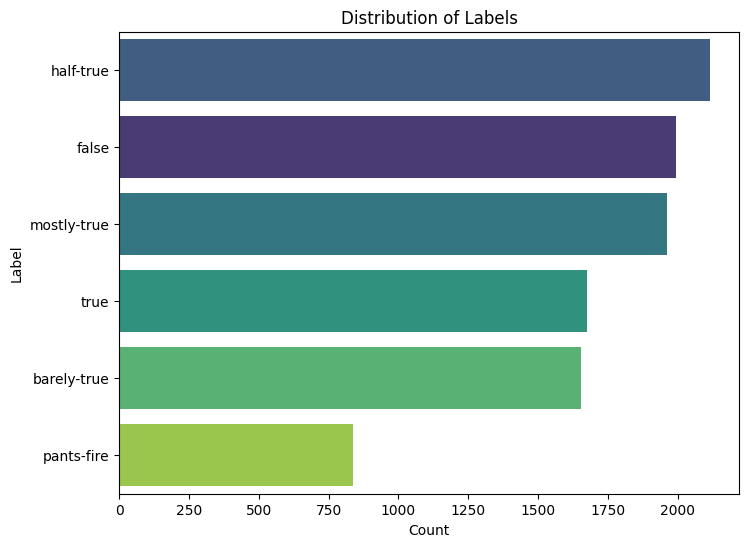

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='label', order=df['label'].value_counts().index, palette='viridis', hue='label', legend=False)
plt.title('Distribution of Labels')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()

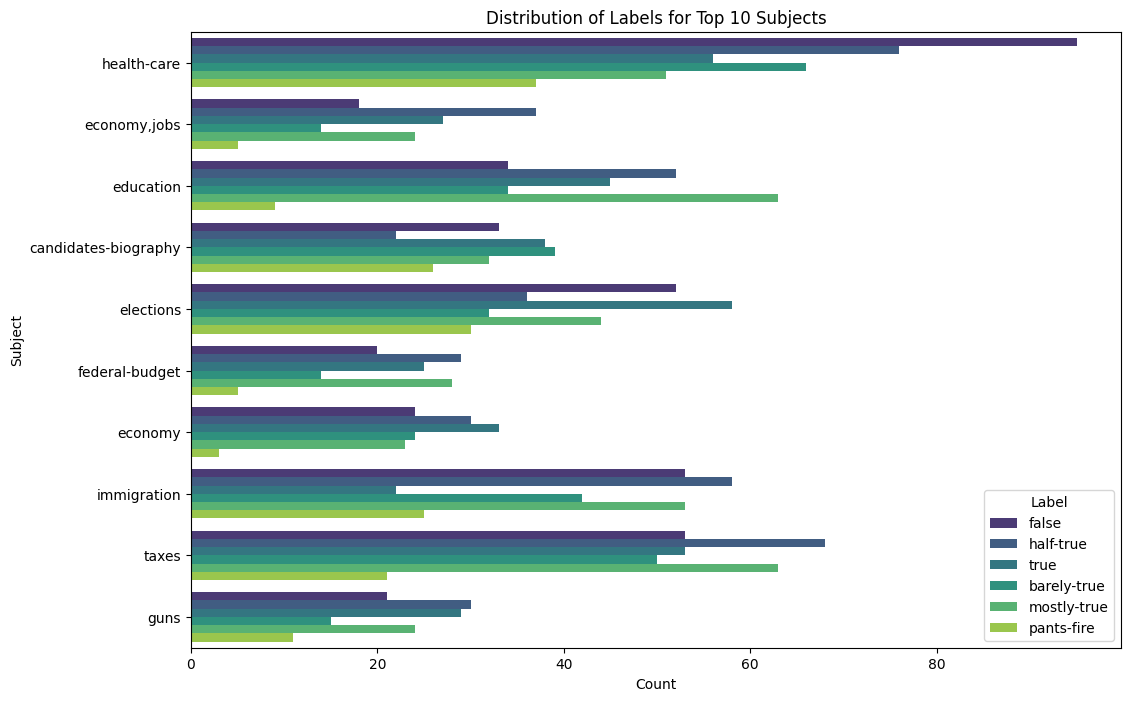

In [41]:
top_subjects = df['subject'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 8))
sns.countplot(data=df[df['subject'].isin(top_subjects)], y='subject', hue='label', palette='viridis')
plt.title('Distribution of Labels for Top 10 Subjects')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.legend(title='Label')
plt.show()

# **Label Encoding the dataset**

In [42]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
print("\nLabel Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Label Mapping: {'barely-true': np.int64(0), 'false': np.int64(1), 'half-true': np.int64(2), 'mostly-true': np.int64(3), 'pants-fire': np.int64(4), 'true': np.int64(5)}


## **Data Preprocessing**
Here we perform the requested cleaning steps:
- **Noise Removal:** Removing special characters and numbers.
- **Stopword Removal:** Removing common words like "the", "is", "at".
- **Lemmatization:** Converting words to their base form (e.g., "running" -> "run").
- **Feature Engineering:** Creating a "Rich Text" field that combines Speaker, Subject, and Statement.

In [43]:
def clean_text(text):
        text = str(text).lower()
        text = re.sub(r'http\S+', '', text)            # remove links
        text = re.sub(r'[^a-z\s]', '', text)           # remove punctuation/numbers
        text = re.sub(r'\s+', ' ', text).strip()       # normalize spaces
        return text
df['clean_statement'] = df['statement'].apply(clean_text)

In [44]:
df.fillna({
    'subject':'unknown',
    'speaker':'unknown',
    'speaker_job_title':'unknown',
    'state_info':'unknown',
    'party_affiliation':'unknown',
    'context':'unknown',

}, inplace=True)


In [45]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data (if not already downloaded)
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text_for_ml(text):
    tokens = text.split() # Assuming text is already cleaned and lowercased
    filtered_tokens = [word for word in tokens if word not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return " ".join(lemmatized_tokens)

df['lemmatized_statement'] = df['clean_statement'].apply(preprocess_text_for_ml)
df[['clean_statement', 'lemmatized_statement']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_statement,lemmatized_statement
0,says the annies list political group supports ...,say annies list political group support thirdt...
1,when did the decline of coal start it started ...,decline coal start started natural gas took st...
2,hillary clinton agrees with john mccain by vot...,hillary clinton agrees john mccain voting give...
3,health care reform legislation is likely to ma...,health care reform legislation likely mandate ...
4,the economic turnaround started at the end of ...,economic turnaround started end term


In [46]:
def preprocess_pipeline(df):
    df = df.fillna('unknown')

    # Create Rich Text Feature FIRST
    # We combine context fields because they are valuable for prediction
    df['lemmatized_statement'] = (
        df['subject'] + " " +
        df['speaker'] + " " +
        df['party_affiliation'] + " " +
        df['statement']
    )

    # Apply cleaning to the rich text
    print("Cleaning text (this may take a moment)...")
    df['cleaned_text'] = df['lemmatized_statement'].apply(clean_text)

    return df
print("Preprocessing Training Data...")
df = preprocess_pipeline(df)

Preprocessing Training Data...
Cleaning text (this may take a moment)...


In [47]:
df[['lemmatized_statement','cleaned_text']]

,lemmatized_statement,cleaned_text
0,abortion dwayne-bohac republican Says the Anni...,abortion dwaynebohac republican says the annie...
1,"energy,history,job-accomplishments scott-surov...",energyhistoryjobaccomplishments scottsurovell ...
2,foreign-policy barack-obama democrat Hillary C...,foreignpolicy barackobama democrat hillary cli...
3,health-care blog-posting none Health care refo...,healthcare blogposting none health care reform...
4,"economy,jobs charlie-crist democrat The econom...",economyjobs charliecrist democrat the economic...
...,...,...
10235,"animals,elections aclu-florida none There are ...",animalselections acluflorida none there are a ...
10236,elections alan-powell republican Democrats hav...,elections alanpowell republican democrats have...
10237,"retirement,social-security herman-cain republi...",retirementsocialsecurity hermancain republican...
10238,"florida,foreign-policy jeff-greene democrat On...",floridaforeignpolicy jeffgreene democrat on li...


## **Word Cloud Statement**

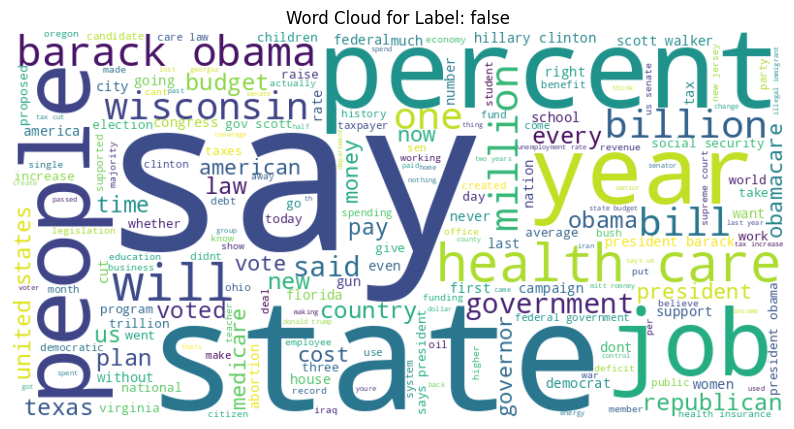

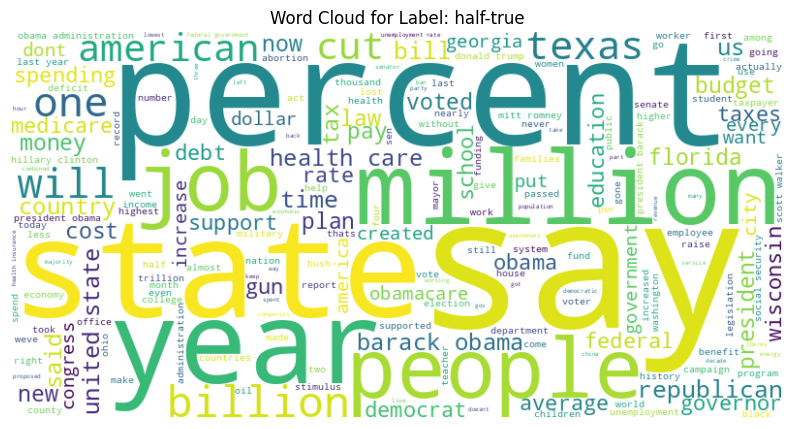

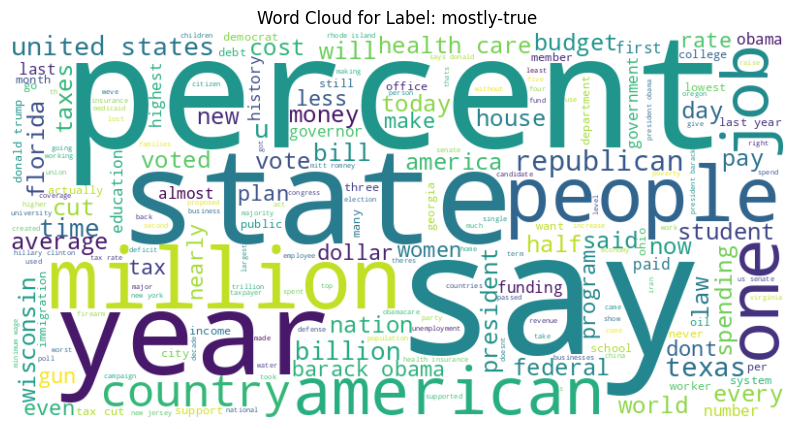

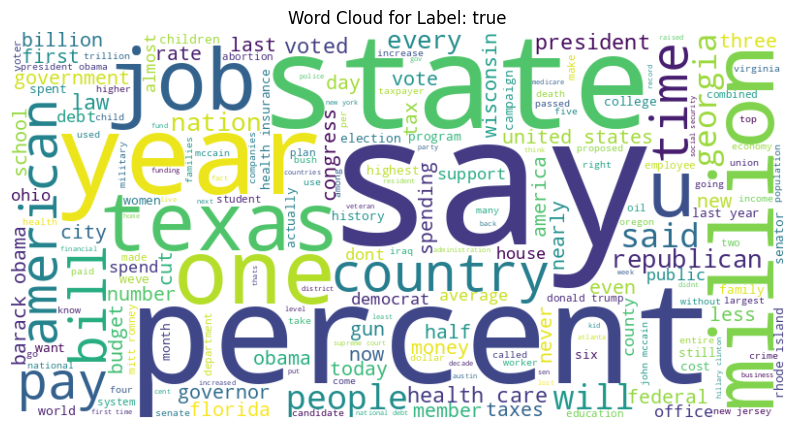

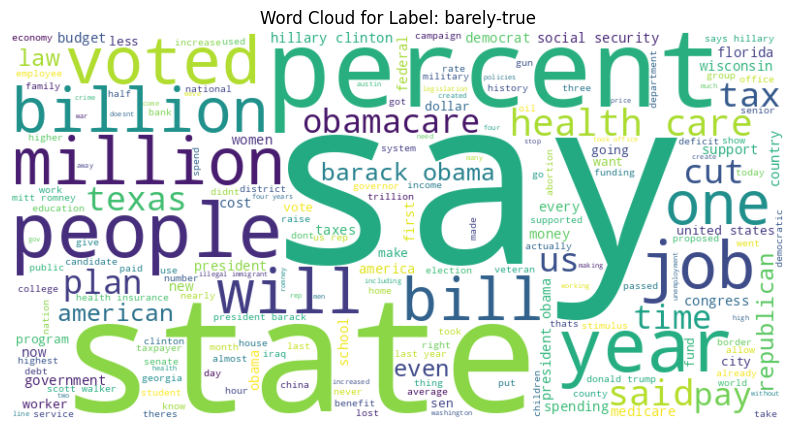

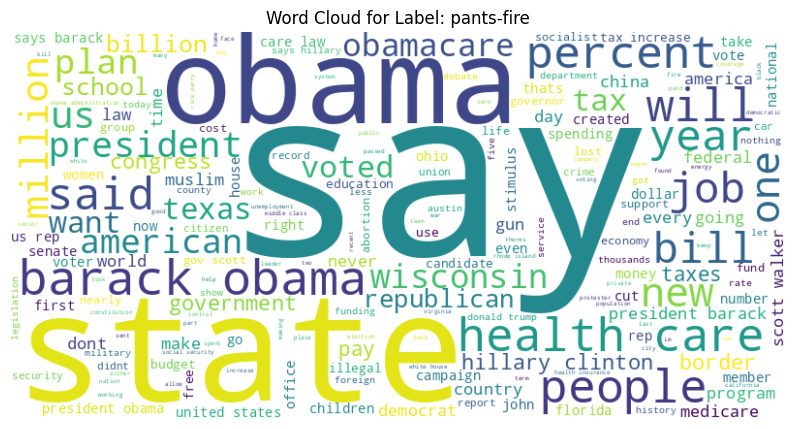

In [48]:


# Word Cloud of statements for each label
for label in df['label'].unique():
    text = " ".join(df[df['label'] == label]['clean_statement'].dropna())
    if text:  # Only generate word cloud if there is text for the label
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10,6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Label: {label}")
        plt.show()
    else:
        print(f"No text available for label: {label}")

# **Applying TF-IDF Vectorization**

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['label_encoded'], test_size=0.2, random_state=42)

In [50]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("\nTF-IDF Shapes -> Train:", X_train_tfidf.shape, " Test:", X_test_tfidf.shape)


TF-IDF Shapes -> Train: (8192, 5000)  Test: (2048, 5000)


# **Machine learning cell**

In [51]:
# Models, metrics, and utilities
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_auc_score
)
import matplotlib.pyplot as plt
import numpy as np
import joblib

RANDOM_STATE = 42
CLASS_NAMES = list(le.classes_)  # uses your existing LabelEncoder

def evaluate_model(estimator, name, Xtr=X_train_tfidf, ytr=y_train, Xte=X_test_tfidf, yte=y_test):
    """Fit, evaluate, and visualize — without repeating logic across models."""
    print(f"\n{name}\n" + "-"*len(name))
    estimator.fit(Xtr, ytr)

    y_pred = estimator.predict(Xte)
    acc = accuracy_score(yte, y_pred)
    f1_macro = f1_score(yte, y_pred, average='macro')
    f1_weighted = f1_score(yte, y_pred, average='weighted')

    # AUC if scores/probabilities are available
    auc = np.nan
    if hasattr(estimator, "predict_proba"):
        y_score = estimator.predict_proba(Xte)
        auc = roc_auc_score(yte, y_score, multi_class="ovr")
    elif hasattr(estimator, "decision_function"):
        y_score = estimator.decision_function(Xte)
        auc = roc_auc_score(yte, y_score, multi_class="ovr")

    print(f"Accuracy: {acc:.4f} | Macro-F1: {f1_macro:.4f} | Weighted-F1: {f1_weighted:.4f}" +
          ("" if np.isnan(auc) else f" | ROC-AUC (OvR): {auc:.4f}"))
    print("\nClassification report:\n")
    print(classification_report(yte, y_pred, target_names=CLASS_NAMES, digits=4))

    # Confusion matrix (normalized for readability)
    cm = confusion_matrix(yte, y_pred, labels=range(len(CLASS_NAMES)), normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_NAMES)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f"{name} — Normalized Confusion Matrix")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return {
        "model_name": name,
        "estimator": estimator,
        "accuracy": acc,
        "macro_f1": f1_macro,
        "weighted_f1": f1_weighted,
        "roc_auc_ovr": auc
    }


## **Models**

In [52]:
models = {
    "LogisticRegression": LogisticRegression(
        max_iter=2000, solver="liblinear", random_state=RANDOM_STATE
    ),
    "LinearSVC": LinearSVC(
        C=1.0, random_state=RANDOM_STATE
    ),

    "RandomForest": RandomForestClassifier(
        n_estimators=300, max_depth=None, n_jobs=-1, random_state=RANDOM_STATE
    )

}



In [53]:
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_auc_score
)
from scipy.special import softmax
import numpy as np
import matplotlib.pyplot as plt

def evaluate_model(estimator, name, Xtr=X_train_tfidf, ytr=y_train, Xte=X_test_tfidf, yte=y_test):
    """Fit, evaluate, and visualize — robust to models without predict_proba."""
    print(f"\n{name}\n" + "-"*len(name))
    estimator.fit(Xtr, ytr)

    y_pred = estimator.predict(Xte)
    acc = accuracy_score(yte, y_pred)
    f1_macro = f1_score(yte, y_pred, average='macro')
    f1_weighted = f1_score(yte, y_pred, average='weighted')

    # Robust ROC-AUC (multiclass OvR): try predict_proba; else softmax(decision_function); else NaN
    auc = np.nan
    try:
        if hasattr(estimator, "predict_proba"):
            y_score = estimator.predict_proba(Xte)
            if len(CLASS_NAMES) == 2:
                auc = roc_auc_score(yte, y_score[:, 1])
            else:
                auc = roc_auc_score(yte, y_score, multi_class="ovr")
        elif hasattr(estimator, "decision_function"):
            raw = estimator.decision_function(Xte)
            if raw.ndim == 1:
                raw = np.vstack([-raw, raw]).T
            y_score = softmax(raw, axis=1)
            if len(CLASS_NAMES) == 2:
                auc = roc_auc_score(yte, y_score[:, 1])
            else:
                auc = roc_auc_score(yte, y_score, multi_class="ovr")
    except Exception as e:
        print(f"Warning: ROC-AUC calculation failed with error: {e}")
        auc = np.nan

    print(f"Accuracy: {acc:.4f} | Macro-F1: {f1_macro:.4f} | Weighted-F1: {f1_weighted:.4f}" +
          ("" if np.isnan(auc) else f" | ROC-AUC (OvR): {auc:.4f}"))
    print("\nClassification report:\n")
    print(classification_report(yte, y_pred, target_names=CLASS_NAMES, digits=4))

    # --- UPDATED CONFUSION MATRIX SECTION ---
    # normalize=None ensures we get counts, not percentages
    cm = confusion_matrix(yte, y_pred, labels=range(len(CLASS_NAMES)), normalize=None)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_NAMES)

    fig, ax = plt.subplots(figsize=(8, 6))
    # values_format='d' forces integer formatting
    disp.plot(ax=ax, cmap='Blues', colorbar=False, values_format='d')
    ax.set_title(f"{name} — Confusion Matrix (Counts)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    # ----------------------------------------

    return {
        "model_name": name,
        "estimator": estimator,
        "accuracy": acc,
        "macro_f1": f1_macro,
        "weighted_f1": f1_weighted,
        "roc_auc_ovr": auc
    }


LogisticRegression
------------------
Accuracy: 0.2568 | Macro-F1: 0.2500 | Weighted-F1: 0.2523 | ROC-AUC (OvR): 0.6110

Classification report:

              precision    recall  f1-score   support

 barely-true     0.2358    0.1593    0.1901       339
       false     0.2477    0.3342    0.2845       401
   half-true     0.2595    0.3265    0.2892       438
 mostly-true     0.2398    0.2775    0.2573       382
  pants-fire     0.4906    0.1757    0.2587       148
        true     0.2716    0.1853    0.2203       340

    accuracy                         0.2568      2048
   macro avg     0.2908    0.2431    0.2500      2048
weighted avg     0.2683    0.2568    0.2523      2048



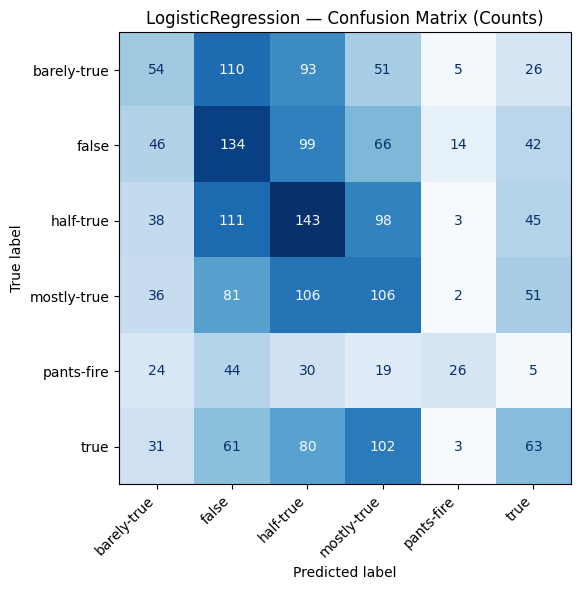


LinearSVC
---------
Accuracy: 0.2266 | Macro-F1: 0.2255 | Weighted-F1: 0.2252 | ROC-AUC (OvR): 0.5809

Classification report:

              precision    recall  f1-score   support

 barely-true     0.2064    0.1711    0.1871       339
       false     0.2242    0.2544    0.2383       401
   half-true     0.2377    0.2648    0.2505       438
 mostly-true     0.2195    0.2356    0.2273       382
  pants-fire     0.2500    0.2432    0.2466       148
        true     0.2296    0.1824    0.2033       340

    accuracy                         0.2266      2048
   macro avg     0.2279    0.2252    0.2255      2048
weighted avg     0.2260    0.2266    0.2252      2048



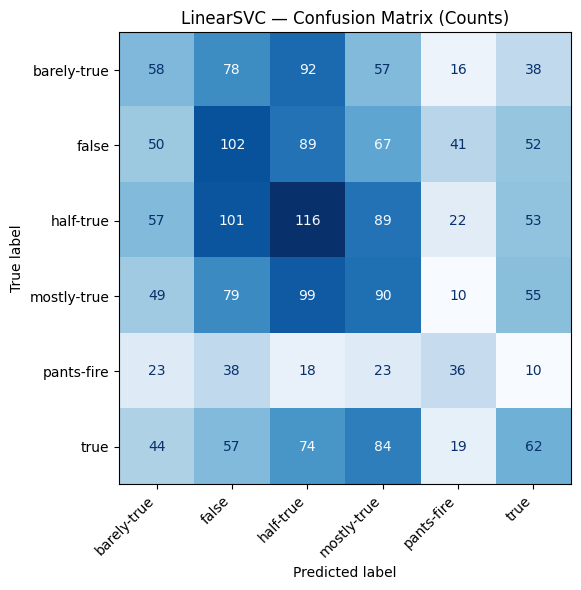


RandomForest
------------
Accuracy: 0.2700 | Macro-F1: 0.2526 | Weighted-F1: 0.2539 | ROC-AUC (OvR): 0.6144

Classification report:

              precision    recall  f1-score   support

 barely-true     0.1829    0.0885    0.1193       339
       false     0.2592    0.4589    0.3312       401
   half-true     0.2511    0.2580    0.2545       438
 mostly-true     0.2931    0.3874    0.3337       382
  pants-fire     0.4688    0.2027    0.2830       148
        true     0.3097    0.1412    0.1939       340

    accuracy                         0.2700      2048
   macro avg     0.2941    0.2561    0.2526      2048
weighted avg     0.2747    0.2700    0.2539      2048



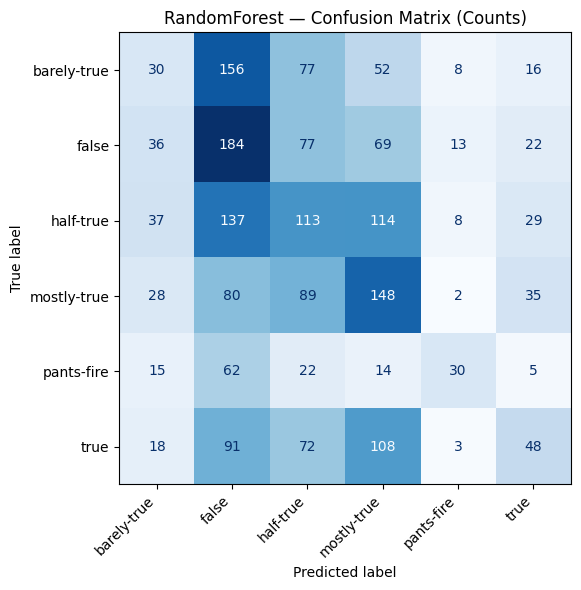


Model leaderboard (sorted by Macro-F1):

        model_name  accuracy  macro_f1  weighted_f1  roc_auc_ovr
      RandomForest  0.270020  0.252615     0.253925     0.614435
LogisticRegression  0.256836  0.250015     0.252280     0.610997
         LinearSVC  0.226562  0.225514     0.225173     0.580857


In [54]:
import pandas as pd

results, trained = [], {}

for name, est in models.items():
    out = evaluate_model(est, name)
    results.append({k: v for k, v in out.items() if k != "estimator"})
    trained[name] = out["estimator"]

results_df = pd.DataFrame(results).sort_values("macro_f1", ascending=False)
print("\nModel leaderboard (sorted by Macro-F1):\n")
print(results_df[["model_name", "accuracy", "macro_f1", "weighted_f1", "roc_auc_ovr"]].to_string(index=False))


In [55]:
from sklearn.preprocessing import LabelEncoder

# Create the binary string label column
df['bi_label_str'] = df['label'].apply(
    lambda status: 'true' if status in ['true', 'mostly-true', 'half-true','barely-true' ]
                   else 'false' if status in ['false', 'pants-fire']
                   else None
)

# Initialize a new LabelEncoder for the binary labels
bi_le = LabelEncoder()

# Encode the new binary label column
df['bi_label_encoded'] = bi_le.fit_transform(df['bi_label_str'])

print("Binary Label Mapping:", dict(zip(bi_le.classes_, bi_le.transform(bi_le.classes_))))
print("\nValue counts for the new binary label:")
print(df['bi_label_str'].value_counts())
print("\nValue counts for the new binary encoded label:")
print(df['bi_label_encoded'].value_counts())



Binary Label Mapping: {'false': np.int64(0), 'true': np.int64(1)}

Value counts for the new binary label:
bi_label_str
true     7406
false    2834
Name: count, dtype: int64

Value counts for the new binary encoded label:
bi_label_encoded
1    7406
0    2834
Name: count, dtype: int64


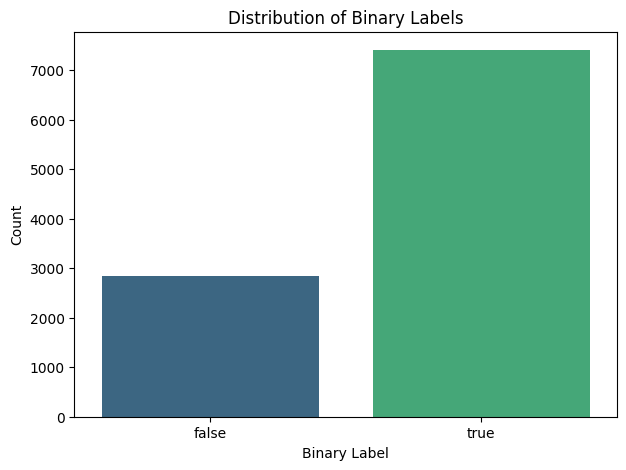

In [56]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='bi_label_str', palette='viridis', hue='bi_label_str', legend=False)
plt.title('Distribution of Binary Labels')
plt.xlabel('Binary Label')
plt.ylabel('Count')
plt.show()

In [57]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# This is crucial for evaluating model performance on unseen data
# `test_size=0.2` allocates 20% of the data to the test set
# `random_state=42` ensures reproducibility of the split, meaning the same rows will be in train/test each time
X_train_bi, X_test_bi, y_train_bi, y_test_bi = train_test_split(
    df['cleaned_text'], df['bi_label_encoded'], test_size=0.2, random_state=42)

print("Shape of X_train_bi:", X_train_bi.shape)
print("Shape of X_test_bi:", X_test_bi.shape)
print("Shape of y_train_bi:", y_train_bi.shape)
print("Shape of y_test_bi:", y_test_bi.shape)

Shape of X_train_bi: (8192,)
Shape of X_test_bi: (2048,)
Shape of y_train_bi: (8192,)
Shape of y_test_bi: (2048,)


In [58]:
vectorizer_bi = TfidfVectorizer(
    max_features=5000, # Limits the number of features (vocabulary size) to the top 5000 most frequent terms.
    stop_words='english' # Removes common English stop words (like 'the', 'is', 'and') that usually don't carry much meaning.
)
X_train_tfidf_bi = vectorizer_bi.fit_transform(X_train_bi)
X_test_tfidf_bi = vectorizer_bi.transform(X_test_bi)

print("\nTF-IDF Shapes (Binary) -> Train:", X_train_tfidf_bi.shape, " Test:", X_test_tfidf_bi.shape)


TF-IDF Shapes (Binary) -> Train: (8192, 5000)  Test: (2048, 5000)



--- Evaluating Models for Binary Classification ---


LogisticRegression
------------------
Accuracy: 0.7378 | Macro-F1: 0.5282 | Weighted-F1: 0.6741 | ROC-AUC (OvR): 0.6526

Classification report:

              precision    recall  f1-score   support

       false     0.5448    0.1330    0.2138       549
        true     0.7513    0.9593    0.8427      1499

    accuracy                         0.7378      2048
   macro avg     0.6480    0.5461    0.5282      2048
weighted avg     0.6959    0.7378    0.6741      2048



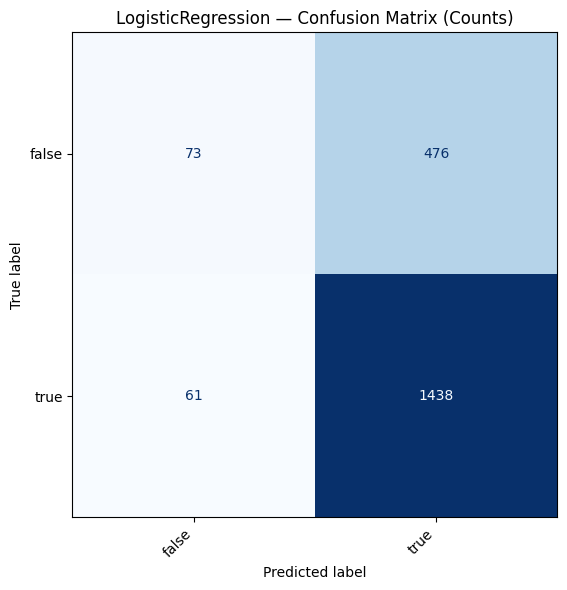


LinearSVC
---------
Accuracy: 0.6855 | Macro-F1: 0.5723 | Weighted-F1: 0.6744 | ROC-AUC (OvR): 0.6192

Classification report:

              precision    recall  f1-score   support

       false     0.3933    0.3188    0.3521       549
        true     0.7667    0.8199    0.7924      1499

    accuracy                         0.6855      2048
   macro avg     0.5800    0.5693    0.5723      2048
weighted avg     0.6666    0.6855    0.6744      2048



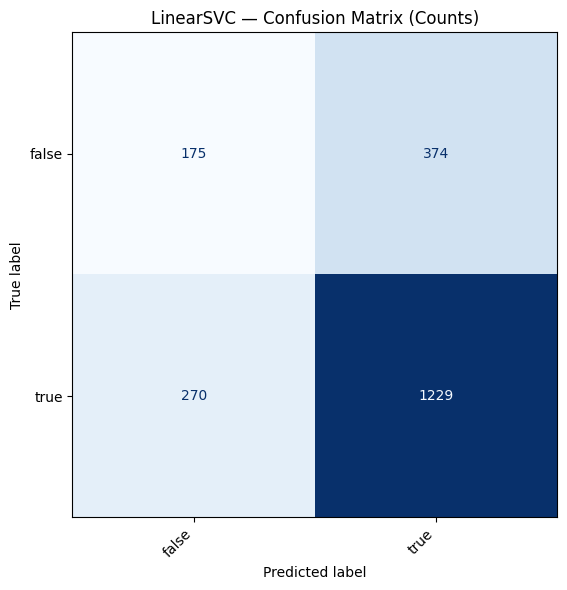


RandomForest
------------
Accuracy: 0.7437 | Macro-F1: 0.5482 | Weighted-F1: 0.6861 | ROC-AUC (OvR): 0.6433

Classification report:

              precision    recall  f1-score   support

       false     0.5789    0.1603    0.2511       549
        true     0.7569    0.9573    0.8454      1499

    accuracy                         0.7437      2048
   macro avg     0.6679    0.5588    0.5482      2048
weighted avg     0.7092    0.7437    0.6861      2048



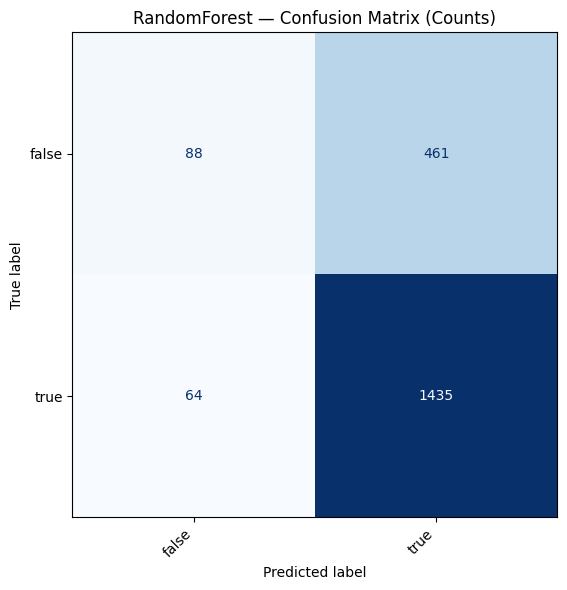


Model leaderboard for Binary Classification (sorted by Macro-F1):

        model_name  accuracy  macro_f1  weighted_f1  roc_auc_ovr
         LinearSVC  0.685547  0.572252     0.674368     0.619234
      RandomForest  0.743652  0.548215     0.686051     0.643290
LogisticRegression  0.737793  0.528212     0.674074     0.652627


In [59]:
import pandas as pd

results_bi, trained_bi = [], {}

# Store original CLASS_NAMES and define binary class names
ORIGINAL_CLASS_NAMES = CLASS_NAMES
CLASS_NAMES = list(bi_le.classes_)

print("\n--- Evaluating Models for Binary Classification ---\n")

for name, est in models.items():
    # Use the binary-specific TF-IDF data and labels
    out = evaluate_model(est, name, Xtr=X_train_tfidf_bi, ytr=y_train_bi, Xte=X_test_tfidf_bi, yte=y_test_bi)
    results_bi.append({k: v for k, v in out.items() if k != "estimator"})
    trained_bi[name] = out["estimator"]

results_df_bi = pd.DataFrame(results_bi).sort_values("macro_f1", ascending=False)
print("\nModel leaderboard for Binary Classification (sorted by Macro-F1):\n")
print(results_df_bi[["model_name", "accuracy", "macro_f1", "weighted_f1", "roc_auc_ovr"]].to_string(index=False))

# Revert CLASS_NAMES to original multi-class labels after binary evaluation
CLASS_NAMES = ORIGINAL_CLASS_NAMES


Original class distribution (binary train):
Counter({1: 5907, 0: 2285})

Resampled class distribution (binary train with SMOTE):
Counter({0: 5907, 1: 5907})

--- Evaluating Models on SMOTE-Resampled Data ---


LogisticRegression
------------------
Accuracy: 0.6416 | Macro-F1: 0.5815 | Weighted-F1: 0.6551 | ROC-AUC (OvR): 0.6420

Classification report:

              precision    recall  f1-score   support

       false     0.3721    0.4900    0.4230       549
        true     0.7887    0.6971    0.7401      1499

    accuracy                         0.6416      2048
   macro avg     0.5804    0.5936    0.5815      2048
weighted avg     0.6770    0.6416    0.6551      2048



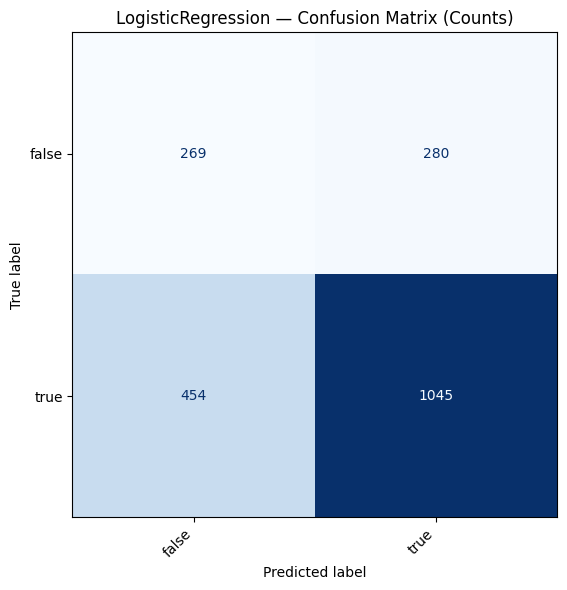


LinearSVC
---------
Accuracy: 0.6226 | Macro-F1: 0.5610 | Weighted-F1: 0.6373 | ROC-AUC (OvR): 0.6094

Classification report:

              precision    recall  f1-score   support

       false     0.3470    0.4627    0.3966       549
        true     0.7758    0.6811    0.7254      1499

    accuracy                         0.6226      2048
   macro avg     0.5614    0.5719    0.5610      2048
weighted avg     0.6609    0.6226    0.6373      2048



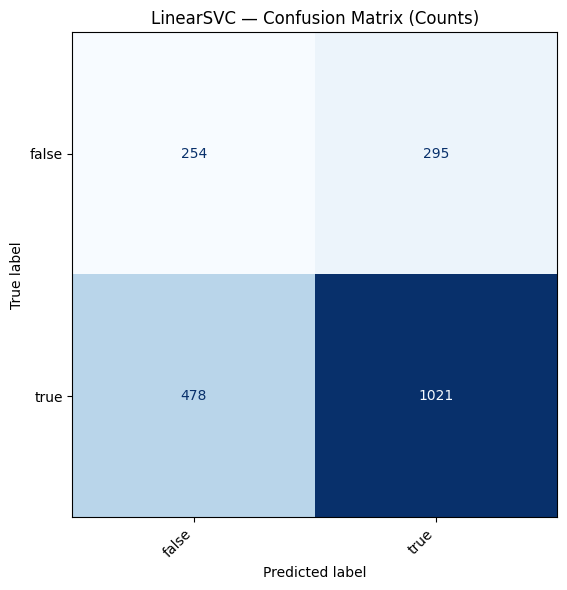


RandomForest
------------
Accuracy: 0.7300 | Macro-F1: 0.5877 | Weighted-F1: 0.7001 | ROC-AUC (OvR): 0.6499

Classification report:

              precision    recall  f1-score   support

       false     0.4932    0.2659    0.3456       549
        true     0.7700    0.8999    0.8299      1499

    accuracy                         0.7300      2048
   macro avg     0.6316    0.5829    0.5877      2048
weighted avg     0.6958    0.7300    0.7001      2048



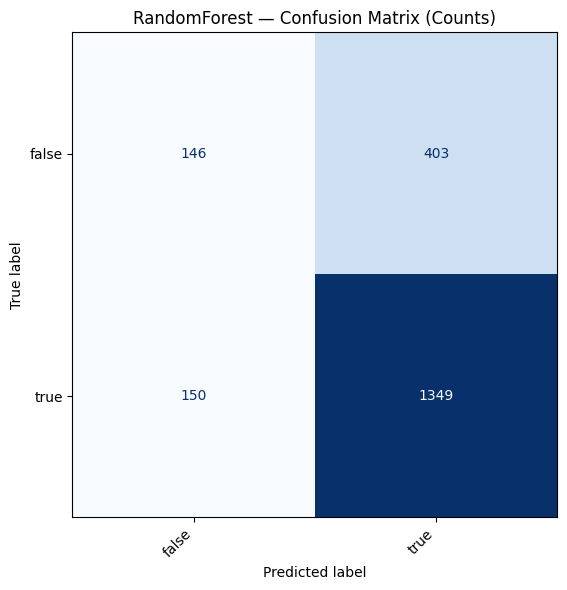


Model leaderboard for Binary Classification (SMOTE-balanced, sorted by Macro-F1):

        model_name  accuracy  macro_f1  weighted_f1  roc_auc_ovr
      RandomForest  0.729980  0.587730     0.700064     0.649910
LogisticRegression  0.641602  0.581520     0.655073     0.642024
         LinearSVC  0.622559  0.560982     0.637250     0.609436


In [60]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Original class distribution (binary train):")
print(Counter(y_train_bi))

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf_bi, y_train_bi)

print("\nResampled class distribution (binary train with SMOTE):")
print(Counter(y_resampled))

print("\n--- Evaluating Models on SMOTE-Resampled Data ---\n")

results_smote_bi, trained_smote_bi = [], {}

# Store original CLASS_NAMES and define binary class names
ORIGINAL_CLASS_NAMES = CLASS_NAMES
CLASS_NAMES = list(bi_le.classes_)

for name, est in models.items():
    # Use the SMOTE-resampled training data and original test data
    out = evaluate_model(est, name, Xtr=X_resampled, ytr=y_resampled, Xte=X_test_tfidf_bi, yte=y_test_bi)
    results_smote_bi.append({k: v for k, v in out.items() if k != "estimator"})
    trained_smote_bi[name] = out["estimator"]

results_df_smote_bi = pd.DataFrame(results_smote_bi).sort_values("macro_f1", ascending=False)
print("\nModel leaderboard for Binary Classification (SMOTE-balanced, sorted by Macro-F1):\n")
print(results_df_smote_bi[["model_name", "accuracy", "macro_f1", "weighted_f1", "roc_auc_ovr"]].to_string(index=False))

# Revert CLASS_NAMES to original multi-class labels after binary evaluation
CLASS_NAMES = ORIGINAL_CLASS_NAMES

# **Word2Vec**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 52.0 MB/s eta 0:00:00
Tokenizing data...
Training Word2Vec model...
Vectorizing documents...
Shape of X_train_w2v: (8192, 100)
Shape of X_test_w2v: (2048, 100)

--- Evaluating Models for Binary Classification (Word2Vec) ---


LogisticRegression
------------------
Accuracy: 0.7339 | Macro-F1: 0.4519 | Weighted-F1: 0.6343 | ROC-AUC (OvR): 0.5912

Classification report:

              precision    recall  f1-score   support

       false     0.5667    0.0310    0.0587       549
        true     0.7364    0.9913    0.8450      1499

    accuracy                         0.7339      2048
   macro avg     0.6515    0.5111    0.4519      2048
weighted avg     0.6909    0.7339    0.6343      2048



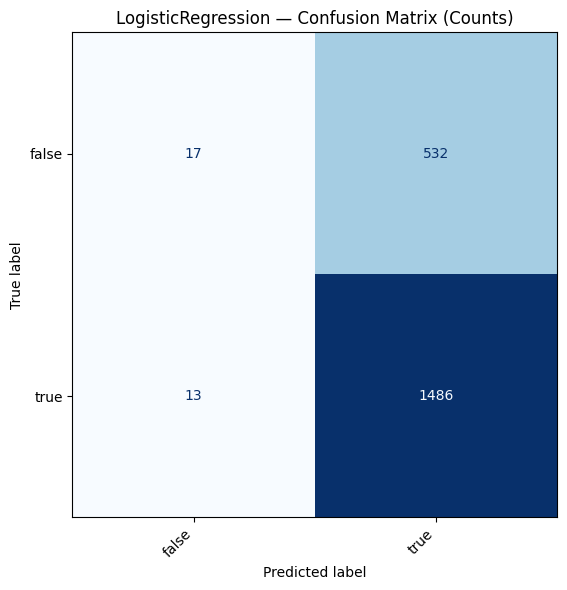


LinearSVC
---------
Accuracy: 0.7329 | Macro-F1: 0.4515 | Weighted-F1: 0.6337 | ROC-AUC (OvR): 0.6005

Classification report:

              precision    recall  f1-score   support

       false     0.5312    0.0310    0.0585       549
        true     0.7361    0.9900    0.8444      1499

    accuracy                         0.7329      2048
   macro avg     0.6337    0.5105    0.4515      2048
weighted avg     0.6812    0.7329    0.6337      2048



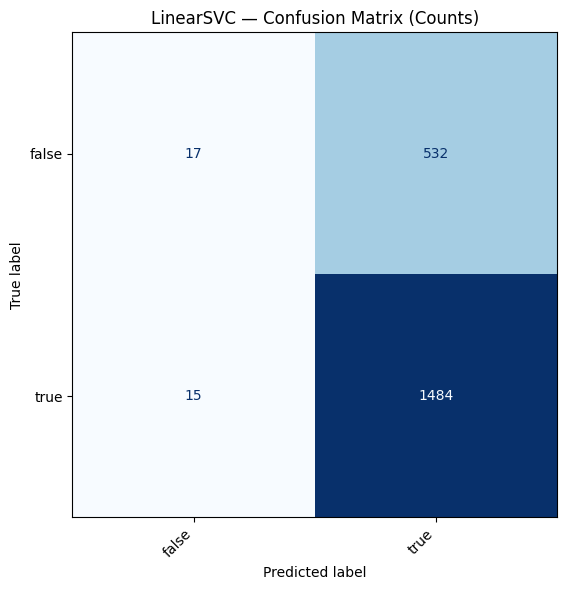


RandomForest
------------
Accuracy: 0.7227 | Macro-F1: 0.4858 | Weighted-F1: 0.6477 | ROC-AUC (OvR): 0.5699

Classification report:

              precision    recall  f1-score   support

       false     0.4128    0.0820    0.1368       549
        true     0.7401    0.9573    0.8348      1499

    accuracy                         0.7227      2048
   macro avg     0.5765    0.5196    0.4858      2048
weighted avg     0.6524    0.7227    0.6477      2048



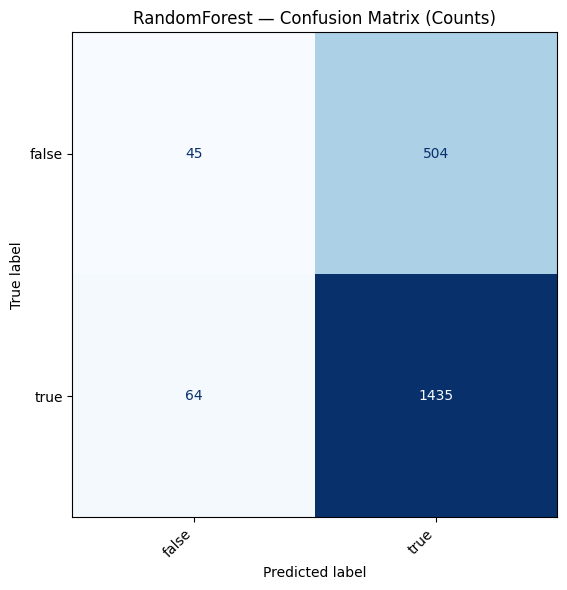


Model leaderboard for Binary Classification (sorted by Macro-F1):

        model_name  accuracy  macro_f1  weighted_f1  roc_auc_ovr
      RandomForest  0.722656  0.485783     0.647675     0.569884
LogisticRegression  0.733887  0.451880     0.634253     0.591158
         LinearSVC  0.732910  0.451451     0.633718     0.600467


In [61]:
!pip install gensim # Install gensim
import numpy as np
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess



# 1. Tokenize the text (Word2Vec needs lists of words, not raw strings)
print("Tokenizing data...")
# simple_preprocess lowercases and removes punctuation
X_train_tokens = [simple_preprocess(text) for text in X_train_bi]
X_test_tokens = [simple_preprocess(text) for text in X_test_bi]

# 2. Train Word2Vec model on the training data
# vector_size=100: Dimension of the vector space
# window=5: Context window size
# min_count=1: Ignore words that appear less than 1 time
print("Training Word2Vec model...")
w2v_model = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=1, workers=4)

# 3. Define a function to average word vectors for a document
def get_mean_vector(word2vec_model, words):
    # Remove out-of-vocabulary words
    words = [word for word in words if word in word2vec_model.wv.key_to_index]
    if len(words) >= 1:
        return np.mean(word2vec_model.wv[words], axis=0)
    else:
        # If document has no words in vocabulary, return vector of zeros
        return np.zeros(word2vec_model.vector_size)

# 4. Transform Train and Test data into vectors
print("Vectorizing documents...")
X_train_w2v = np.array([get_mean_vector(w2v_model, tokens) for tokens in X_train_tokens])
X_test_w2v = np.array([get_mean_vector(w2v_model, tokens) for tokens in X_test_tokens])

print("Shape of X_train_w2v:", X_train_w2v.shape)
print("Shape of X_test_w2v:", X_test_w2v.shape)

# --- Evaluate Models ---
import pandas as pd

results_bi, trained_bi = [], {}

# Store original CLASS_NAMES and define binary class names
ORIGINAL_CLASS_NAMES = CLASS_NAMES
CLASS_NAMES = list(bi_le.classes_)

print("\n--- Evaluating Models for Binary Classification (Word2Vec) ---\n")

for name, est in models.items():
    # Note: If using Naive Bayes (MultinomialNB), it will fail here because
    # Word2Vec produces negative values. Use GaussianNB or scale data to [0,1] if needed.

    # Use the Word2Vec data (X_train_w2v, X_test_w2v)
    out = evaluate_model(est, name, Xtr=X_train_w2v, ytr=y_train_bi, Xte=X_test_w2v, yte=y_test_bi)
    results_bi.append({k: v for k, v in out.items() if k != "estimator"})
    trained_bi[name] = out["estimator"]

results_df_bi = pd.DataFrame(results_bi).sort_values("macro_f1", ascending=False)
print("\nModel leaderboard for Binary Classification (sorted by Macro-F1):\n")
print(results_df_bi[["model_name", "accuracy", "macro_f1", "weighted_f1", "roc_auc_ovr"]].to_string(index=False))

# Revert CLASS_NAMES
CLASS_NAMES = ORIGINAL_CLASS_NAMES

--- Starting Hyperparameter Tuning & Evaluation ---

 Tuning LogisticRegression...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
   Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Tuned LogisticRegression
------------------------
Accuracy: 0.6914 | Macro-F1: 0.5773 | Weighted-F1: 0.6792 | ROC-AUC (OvR): 0.6216

Classification report:

              precision    recall  f1-score   support

       false     0.4046    0.3206    0.3577       549
        true     0.7688    0.8272    0.7969      1499

    accuracy                         0.6914      2048
   macro avg     0.5867    0.5739    0.5773      2048
weighted avg     0.6711    0.6914    0.6792      2048



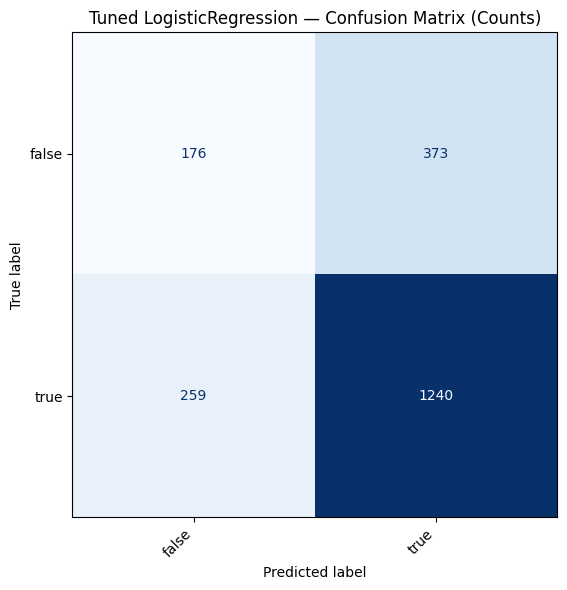

 Tuning LinearSVC...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
   Best Params: {'C': 1, 'dual': 'auto'}

Tuned LinearSVC
---------------
Accuracy: 0.6855 | Macro-F1: 0.5723 | Weighted-F1: 0.6744 | ROC-AUC (OvR): 0.6192

Classification report:

              precision    recall  f1-score   support

       false     0.3933    0.3188    0.3521       549
        true     0.7667    0.8199    0.7924      1499

    accuracy                         0.6855      2048
   macro avg     0.5800    0.5693    0.5723      2048
weighted avg     0.6666    0.6855    0.6744      2048



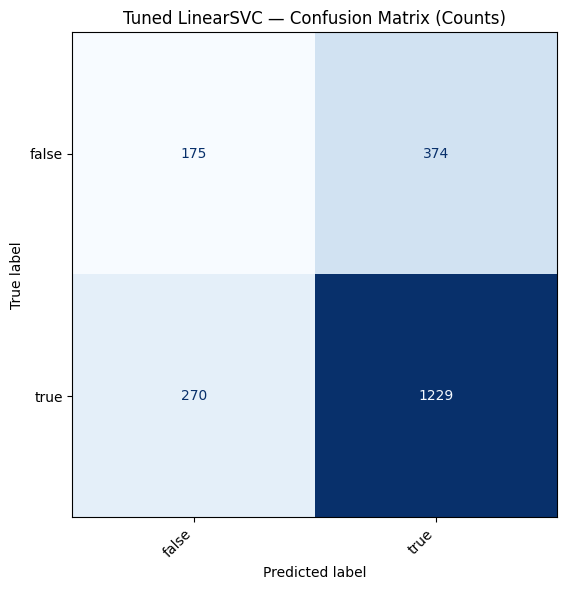

 Tuning RandomForest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
   Best Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}

Tuned RandomForest
------------------
Accuracy: 0.7451 | Macro-F1: 0.5553 | Weighted-F1: 0.6901 | ROC-AUC (OvR): 0.6426

Classification report:

              precision    recall  f1-score   support

       false     0.5839    0.1712    0.2648       549
        true     0.7589    0.9553    0.8458      1499

    accuracy                         0.7451      2048
   macro avg     0.6714    0.5633    0.5553      2048
weighted avg     0.7120    0.7451    0.6901      2048



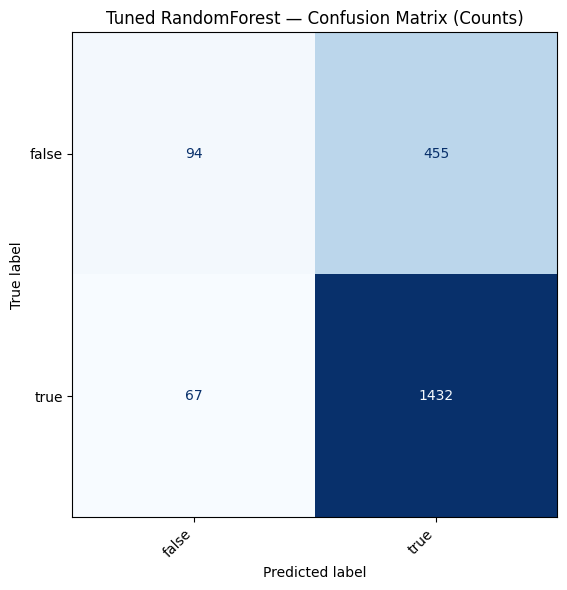


FINAL TUNING RESULTS LEADERBOARD
              model_name  accuracy  macro_f1  weighted_f1  roc_auc_ovr                                                       best_params
Tuned LogisticRegression  0.691406  0.577319     0.679183     0.621642                 {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
         Tuned LinearSVC  0.685547  0.572252     0.674368     0.619234                                          {'C': 1, 'dual': 'auto'}
      Tuned RandomForest  0.745117  0.555312     0.690077     0.642580 {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


In [63]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

# 1. Define Parameter Grids
# We explore different strengths of regularization (C) and tree structures
param_grids = {
    "LogisticRegression": {
        'C': [0.1, 1, 10],
        'penalty': ['l2'], # liblinear supports l1 and l2, but l2 is safer default
        'solver': ['liblinear']
    },
    "LinearSVC": {
        'C': [0.1, 1, 10],
        'dual': ['auto'] # 'auto' chooses the best algorithm based on data shape
    },
    "RandomForest": {
        'n_estimators': [100, 200],      # Number of trees
        'max_depth': [None, 20, 50],     # Maximum depth of the tree
        'min_samples_split': [2, 10]     # Minimum samples required to split a node
    }
}

# 2. Initialize storage for final results
tuning_results = []
best_models_tuned = {}

print("--- Starting Hyperparameter Tuning & Evaluation ---\n")

# Store original CLASS_NAMES and define binary class names for this cell
ORIGINAL_CLASS_NAMES_BEFORE_TUNING = CLASS_NAMES
CLASS_NAMES = list(bi_le.classes_)

for name, model in models.items():
    print(f" Tuning {name}...")

    # Run Grid Search
    # cv=3 is used here to speed up the process; use cv=5 for more robustness if time permits
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=3,
        scoring='f1_macro',
        n_jobs=-1,
        verbose=1
    )

    # Fit on the TF-IDF training data
    grid_search.fit(X_train_tfidf_bi, y_train_bi)

    best_est = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_models_tuned[name] = best_est

    print(f"   Best Params: {best_params}")

    # 3. Evaluate and Plot Confusion Matrix
    # We use the helper function 'evaluate_model' defined previously
    # This will PLOT the confusion matrix automatically
    eval_metrics = evaluate_model(
        best_est,
        f"Tuned {name}",
        Xtr=X_train_tfidf_bi,
        ytr=y_train_bi,
        Xte=X_test_tfidf_bi,
        yte=y_test_bi
    )

    # 4. Add Best Parameters to the metrics for the final table
    eval_metrics['best_params'] = str(best_params) # Convert dict to string for display
    tuning_results.append(eval_metrics)

# 5. Create and Show Final Summary Table
print("\n" + "="*50)
print("FINAL TUNING RESULTS LEADERBOARD")
print("="*50)

results_df = pd.DataFrame(tuning_results)

# Reorder columns to put Model Name and Accuracy first, Best Params last
cols = ["model_name", "accuracy", "macro_f1", "weighted_f1", "roc_auc_ovr", "best_params"]
results_df = results_df[cols].sort_values("macro_f1", ascending=False)

# Display the table
# We use .set_option to ensure the full parameter string is visible
pd.set_option('display.max_colwidth', None)
print(results_df.to_string(index=False))

# Revert CLASS_NAMES to its original state after tuning
CLASS_NAMES = ORIGINAL_CLASS_NAMES_BEFORE_TUNING

# **Kfold Model**

In [64]:
from sklearn.model_selection import StratifiedKFold, cross_validate
import pandas as pd
import numpy as np

# 1. Initialize models with the BEST parameters from your results
best_models_fixed = {
    "LogisticRegression": LogisticRegression(
        C=10,
        penalty='l2',
        solver='liblinear',
        random_state=42
    ),
    "LinearSVC": LinearSVC(
        C=1,
        dual='auto',
        random_state=42
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=10,
        n_jobs=-1,
        random_state=42
    )
}

# 2. Define K-Fold Strategy
# n_splits=5 or 10 is standard. Stratified ensures each fold has the same class ratio.
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

kfold_results = []

print("--- Running 5-Fold Cross-Validation with Best Parameters ---\n")

for name, model in best_models_fixed.items():
    print(f"Processing {name}...")

    # 3. Apply Cross-Validation
    # We check both Accuracy and Macro F1 score
    scores = cross_validate(
        model,
        X_train_tfidf_bi,
        y_train_bi,
        cv=k_fold,
        scoring=['accuracy', 'f1_macro'],
        n_jobs=-1
    )

    # 4. Calculate Mean and Standard Deviation
    mean_acc = np.mean(scores['test_accuracy'])
    std_acc = np.std(scores['test_accuracy'])
    mean_f1 = np.mean(scores['test_f1_macro'])
    std_f1 = np.std(scores['test_f1_macro'])

    kfold_results.append({
        "Model": name,
        "Mean Accuracy": mean_acc,
        "Std Accuracy": std_acc,
        "Mean Macro F1": mean_f1,
        "Std Macro F1": std_f1
    })

# 5. Display Final K-Fold Results
results_kfold_df = pd.DataFrame(kfold_results).sort_values("Mean Macro F1", ascending=False)

print("\n" + "="*60)
print("K-FOLD CROSS-VALIDATION RESULTS (5 Folds)")
print("="*60)
# Formatting for cleaner output
print(results_kfold_df.round(4).to_string(index=False))

--- Running 5-Fold Cross-Validation with Best Parameters ---

Processing LogisticRegression...
Processing LinearSVC...
Processing RandomForest...

K-FOLD CROSS-VALIDATION RESULTS (5 Folds)
             Model  Mean Accuracy  Std Accuracy  Mean Macro F1  Std Macro F1
         LinearSVC         0.7015        0.0086         0.5784        0.0103
LogisticRegression         0.7018        0.0090         0.5767        0.0105
      RandomForest         0.7363        0.0056         0.5349        0.0117


Initializing SHAP TreeExplainer...
Calculating SHAP values for 100 samples...
Calculation finished in 0.10 seconds.
SHAP output type: <class 'numpy.ndarray'>
Detected single array format.
Shape Mismatch! Values: (100, 5000, 2), Data: (100, 5000)

--- Global Feature Importance (Top 20 Words) ---


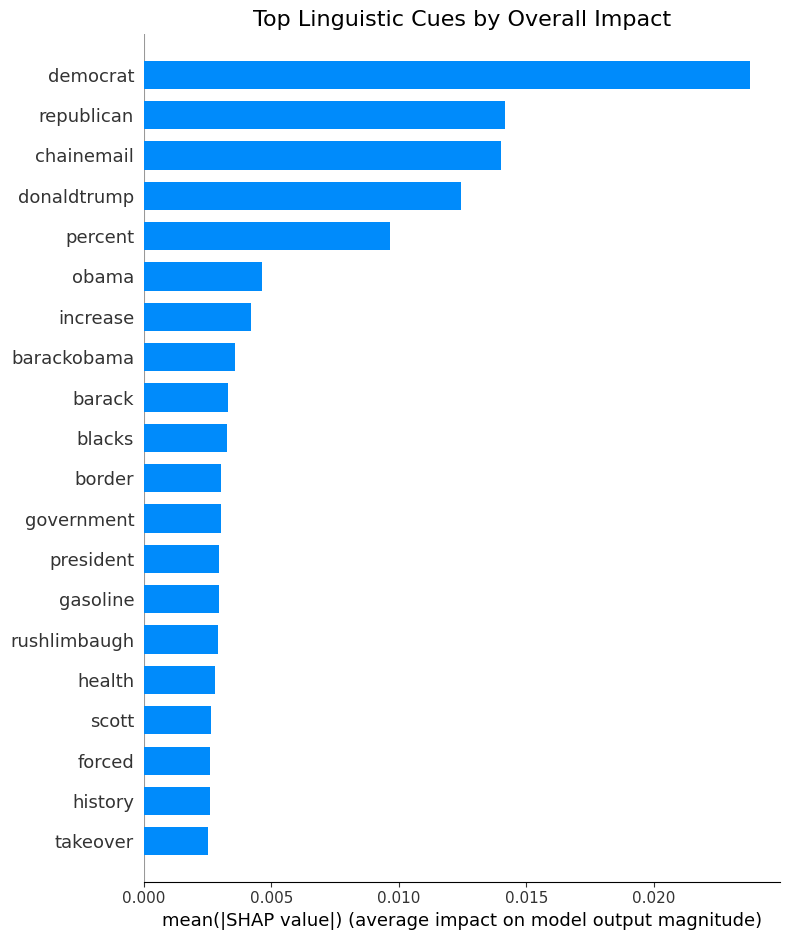


--- Directional Linguistic Cues (Beeswarm) ---
RED = Word Present | BLUE = Word Absent
Right Side = Predicts 'Real' | Left Side = Predicts 'Misinformation'


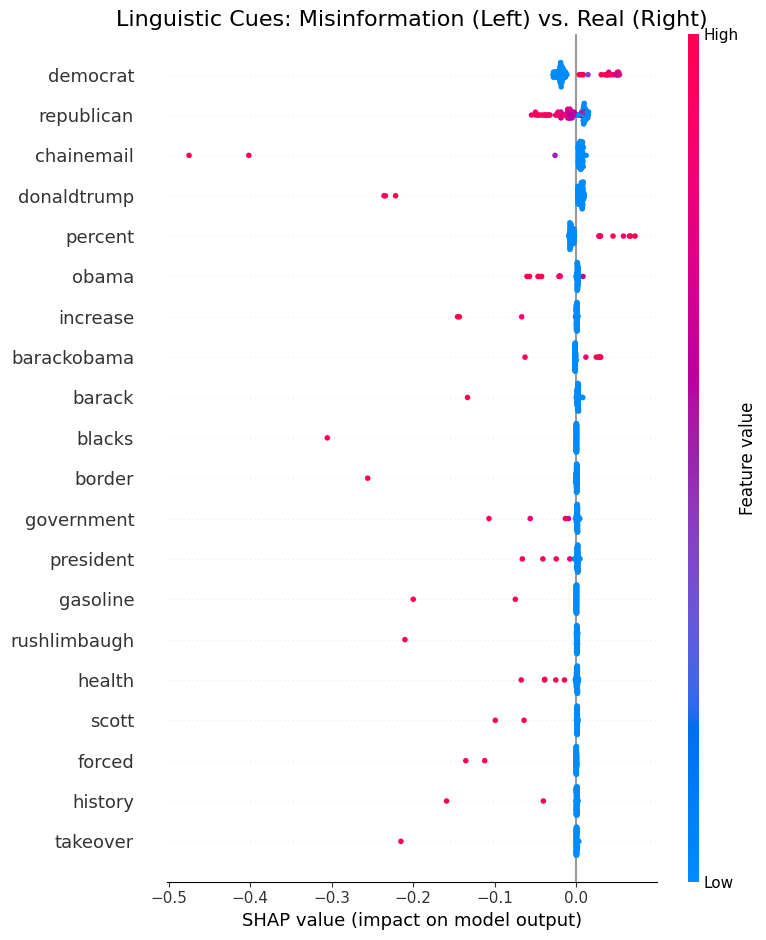

In [65]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

# 1. Select your best Random Forest model
# Ensure 'best_models_tuned' is defined from your previous steps
if "RandomForest" not in best_models_tuned:
    raise ValueError("RandomForest model not found in best_models_tuned.")

rf_model = best_models_tuned["RandomForest"]

# 2. Prepare the explainer
print("Initializing SHAP TreeExplainer...")
# TreeExplainer is optimized for trees and much faster than KernelExplainer
explainer = shap.TreeExplainer(rf_model)

# 3. Prepare Data Sample (Optimized for Speed)
# SHAP is expensive on text data. We use 100 samples which is enough for the summary plots.
n_samples = 100

# Convert sparse matrix to dense array for SHAP
# We take the first n_samples from your test set
X_test_sample = X_test_tfidf_bi[:n_samples].toarray()

# 4. Calculate SHAP values
print(f"Calculating SHAP values for {n_samples} samples...")
start_time = time.time()

# approximate=True:  Ignores complex interactions (Massive speedup: 50x-100x faster)
# check_additivity=False: Disables precision check (Required when using approximate)
shap_values = explainer.shap_values(
    X_test_sample,
    approximate=True,
    check_additivity=False
)

print(f"Calculation finished in {time.time() - start_time:.2f} seconds.")

# 5. Get feature names for plotting
feature_names = vectorizer_bi.get_feature_names_out()

# 6. FIX: Determine correct shape for plotting
# SHAP sometimes returns a list [Class0, Class1] and sometimes a single array.
print(f"SHAP output type: {type(shap_values)}")

if isinstance(shap_values, list):
    print("Detected binary classification list format.")
    # For binary classification (0=Fake, 1=Real), index 1 usually represents the "Real" class.
    # We plot the features that drive the prediction towards 'Real'.
    values_to_plot = shap_values[1]
else:
    print("Detected single array format.")
    values_to_plot = shap_values

# 7. Check shape consistency before plotting
# This prevents the AssertionError you saw earlier
if values_to_plot.shape != X_test_sample.shape:
    print(f"Shape Mismatch! Values: {values_to_plot.shape}, Data: {X_test_sample.shape}")
    # Fallback: If shape is (samples, features, outputs), take the output for class 1
    if len(values_to_plot.shape) == 3:
        values_to_plot = values_to_plot[:, :, 1]

# --- VISUALIZATION 1: Global Feature Importance (Bar Chart) ---
print("\n--- Global Feature Importance (Top 20 Words) ---")
plt.figure(figsize=(10, 8))
shap.summary_plot(
    values_to_plot,
    X_test_sample,
    feature_names=feature_names,
    plot_type="bar",
    show=False
)
plt.title("Top Linguistic Cues by Overall Impact", fontsize=16)
plt.tight_layout()
plt.show()

# --- VISUALIZATION 2: Directional Impact (Beeswarm Plot) ---
print("\n--- Directional Linguistic Cues (Beeswarm) ---")
print("RED = Word Present | BLUE = Word Absent")
print("Right Side = Predicts 'Real' | Left Side = Predicts 'Misinformation'")

plt.figure(figsize=(12, 10))
shap.summary_plot(
    values_to_plot,
    X_test_sample,
    feature_names=feature_names,
    show=False
)
plt.title("Linguistic Cues: Misinformation (Left) vs. Real (Right)", fontsize=16)
plt.tight_layout()
plt.show()